In [13]:
!pip install duckdb==0.8.1 
# May or may not be necessary with the new update but I'll leave it here just in case


In [65]:
#import libraries first
import duckdb 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dotenv import load_dotenv
import os

In [67]:
load_dotenv()

token = os.getenv('motherduck_token')

In [68]:
# Set your MotherDuck token


# Connect to the database
con = duckdb.connect(f"md:?motherduck_token={token}")

# Define your SQL query
sql_query = "SELECT * FROM stocks_clouddb.msft_data"

# Execute the query and fetch the result into a DataFrame
df = con.sql("SELECT * FROM stocks_clouddb.msft_data").fetchdf().copy()

In [69]:
# Define your SQL query
sql_query = "SELECT * FROM stocks_clouddb.msft_data"
sql_query

'SELECT * FROM stocks_clouddb.msft_data'

In [70]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
             datetime  open_price  day_high   day_low  close_price  \
0 1986-03-12 21:00:00    0.055004  0.063093  0.055004     0.060396   
1 1986-03-13 21:00:00    0.060396  0.063632  0.060396     0.062553   
2 1986-03-16 21:00:00    0.062553  0.064172  0.062553     0.063632   
3 1986-03-17 21:00:00    0.063632  0.064172  0.061475     0.062014   
4 1986-03-18 21:00:00    0.062014  0.062553  0.060396     0.060936   

       volume  dividends  stock_splits  
0  1031788800        0.0           0.0  
1   308160000        0.0           0.0  
2   133171200        0.0           0.0  
3    67766400        0.0           0.0  
4    47894400        0.0           0.0  


In [41]:
# Get a summary of the dataset
print("Dataset summary:")
print(df.info())


Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12470 entries, 0 to 12469
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      12470 non-null  datetime64[ns]
 1   open_price    12470 non-null  float64       
 2   day_high      12470 non-null  float64       
 3   day_low       12470 non-null  float64       
 4   close_price   12470 non-null  float64       
 5   volume        12470 non-null  int32         
 6   dividends     12470 non-null  float64       
 7   stock_splits  12470 non-null  float32       
dtypes: datetime64[ns](1), float32(1), float64(5), int32(1)
memory usage: 682.1 KB
None


In [42]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
                            datetime    open_price      day_high  \
count                          12470  12470.000000  12470.000000   
mean   2009-03-31 15:00:04.907778560    103.955466    104.516040   
min              1986-03-12 21:00:00      0.055004      0.057161   
25%              1998-07-13 03:00:00     13.649901     13.970221   
50%              2010-11-30 09:00:00     23.567357     23.736341   
75%              2021-12-29 09:15:00    244.250000    245.380001   
max              2023-10-09 12:30:00    364.179993    366.779999   
std                              NaN    124.010181    124.490328   

            day_low   close_price        volume     dividends  stock_splits  
count  12470.000000  12470.000000  1.247000e+04  12470.000000  12470.000000  
mean     103.398609    103.967006  4.344936e+07      0.002132      0.001363  
min        0.055004      0.056083  7.888970e+05      0.000000      0.000000  
25%       13.419949     13.658828

In [43]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())



Missing values:
datetime        0
open_price      0
day_high        0
day_low         0
close_price     0
volume          0
dividends       0
stock_splits    0
dtype: int64


In [44]:
# Check for duplicate rows
print("Duplicate rows:")
print(df.duplicated().sum())

Duplicate rows:
0


Data Visualization 

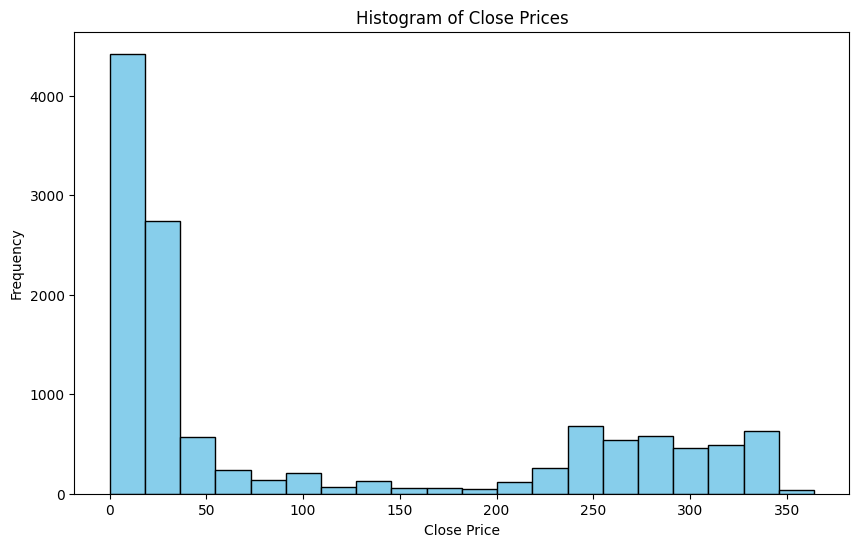

In [50]:


# Assuming you've already loaded your dataset into the 'df' DataFrame
# To create a histogram for the "close_price" column:

# Step 1: Extract the "close_price" column
close_price_data = df['close_price']

# Step 2: Create the histogram
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.hist(close_price_data, bins=20, edgecolor='black', color='skyblue')

# Step 3: Customize the plot
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Step 4: Show the histogram
plt.show()

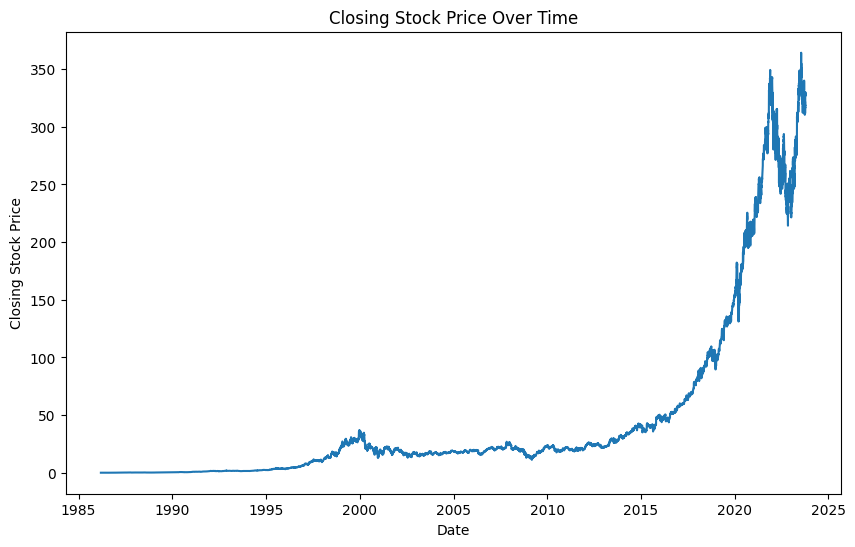

In [51]:
#line chart of closing stock price over time 

plt.figure(figsize=(10,6))
sns.lineplot(x='datetime', y = 'close_price', data = df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

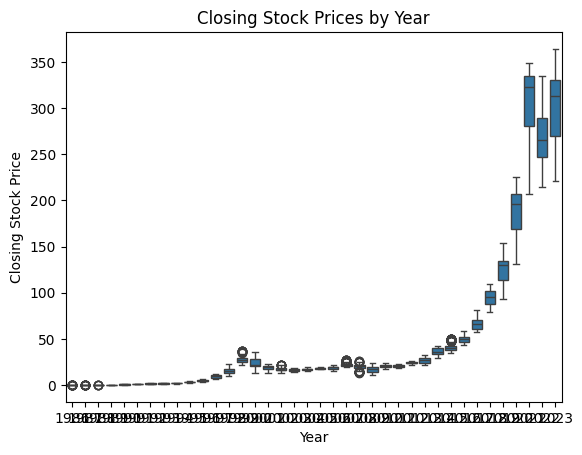

In [53]:
df['year'] = df['datetime'].dt.year
sns.boxplot(x='year', y='close_price', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

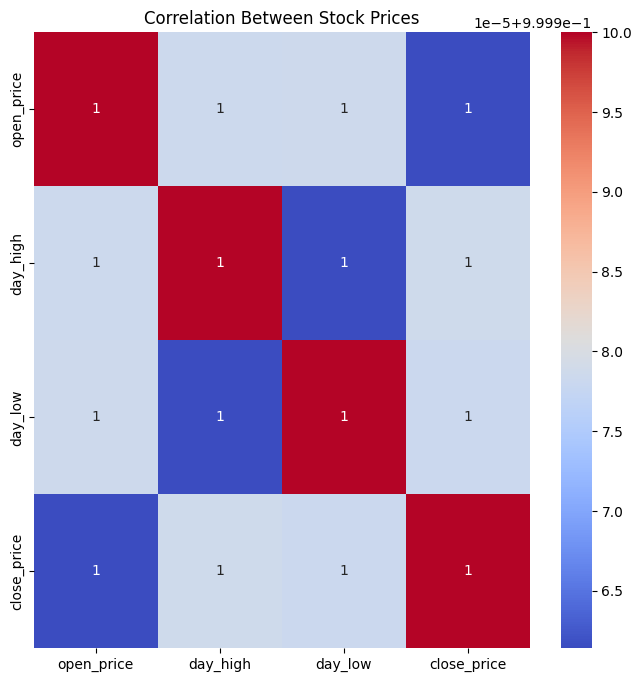

In [56]:
#create a heatmap of the correlation between stock prices 

corr = df[['open_price','day_high','day_low','close_price']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()
#it shows the opening and closing prices have a strong positive correlation, while the low and high prices have a weaker positive correlation. 

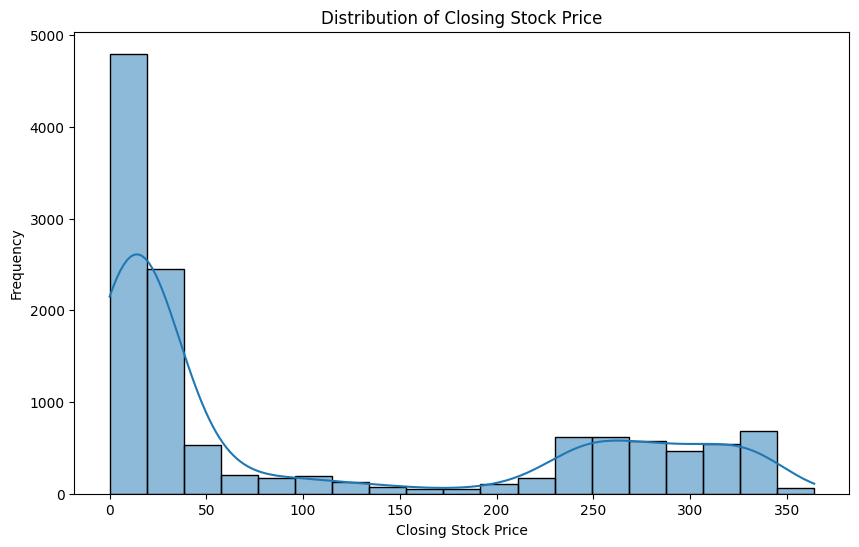

In [58]:
plt.figure(figsize = (10,6))
sns.histplot(df['close_price'],kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

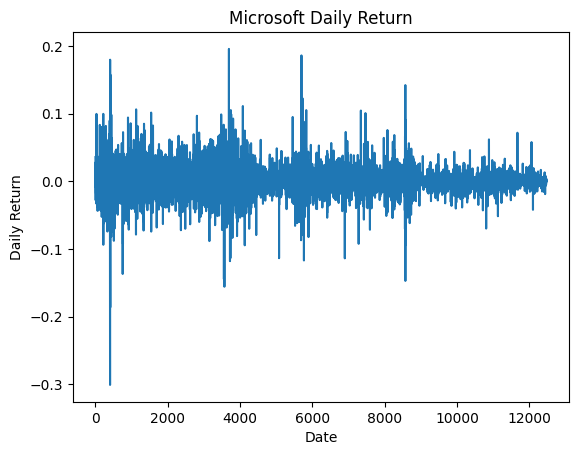

In [62]:
#create a line chart of the daily returns over time 

daily_returns = df['close_price'].pct_change()

plt.plot(daily_returns.index, daily_returns.values)

plt.title('Microsoft Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()